<a href="https://colab.research.google.com/github/ekoprasetio5/Implementasi-Data-Analysis-pada-Data-E-Commerce-Menggunakan-Exploratory-Data-Analysis-EDA-/blob/main/Implementasi_Data_Analysis_pada_Data_E_Commerce_Menggunakan_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Load dataset
train_data = pd.read_csv('/content/drive/MyDrive/0. Projek Qarir Academi/One Week Projek Machine Learning/train.csv')
predict_data = pd.read_csv('/content/drive/MyDrive/0. Projek Qarir Academi/One Week Projek Machine Learning/predict2024.csv')

# Data Understanding

In [ ]:
# Data Understanding
print("Train Data Shape:", train_data.shape)
print("Predict Data Shape:", predict_data.shape)

Train Data Shape: (40100, 13)
Predict Data Shape: (14707, 12)


In [ ]:
# Menampilkan beberapa data dari train
train_data.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,48048,Sales & Marketing,region_14,NaN,m,other,1,23,1.0,2,0,53,0
1,39657,Finance,region_29,Bachelor's,m,other,2,26,NaN,1,0,58,0
2,16937,Operations,region_22,Bachelor's,f,sourcing,2,29,NaN,1,0,62,0
3,69661,Analytics,region_4,Master's & above,m,other,1,32,4.0,5,0,84,0
4,11746,Sales & Marketing,region_26,Bachelor's,f,other,1,31,3.0,5,0,49,0


In [ ]:
# Menampilkan beberapa data dari predict
predict_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,3387,Procurement,region_15,Bachelor's,f,other,1,36,3.0,3,0,69
1,67479,Sales & Marketing,region_7,Bachelor's,m,sourcing,2,31,5.0,4,0,51
2,8070,Operations,region_13,Bachelor's,f,sourcing,1,40,3.0,13,0,63
3,46497,Analytics,region_26,Bachelor's,m,other,1,31,1.0,4,0,85
4,54990,Operations,region_28,Bachelor's,m,sourcing,1,24,NaN,1,0,55


# Data Preparation

In [ ]:
# Data Preparation
# Mengatasi nilai yang hilang
train_data['education'].fillna('Unknown', inplace=True)
train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].mean(), inplace=True)


<ipython-input-100-f2f1733bf832>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['education'].fillna('Unknown', inplace=True)
<ipython-input-100-f2f1733bf832>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
# Encoding kategori ke numerik
label_encoders = {}
for column in ['department', 'region', 'education', 'gender', 'recruitment_channel']:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    label_encoders[column] = le


In [ ]:
# Pisahkan fitur dan target
X = train_data.drop(['employee_id', 'is_promoted'], axis=1)
y = train_data['is_promoted']


In [ ]:
# Split data menjadi training dan validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Exploratory Data Analysis (EDA)

In [ ]:
# Deskripsi statistik data
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,year_promoted
count,40100.000000,40100.000000,40100.000000,37076.000000,40100.000000,40100.000000,40100.000000,40100.000000,40100.000000
mean,39217.938728,1.255062,34.809501,3.326923,5.873965,0.023441,63.408878,0.085711,2021.430723
std,22591.119028,0.612944,7.665358,1.262097,4.278233,0.151303,13.372079,0.279940,2.252921
min,2.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000,2018.000000
25%,19703.500000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000,2019.000000
50%,39283.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000,2021.000000
75%,58768.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000,2023.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000,2025.000000


In [ ]:
# Informasi tipe data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40100 entries, 0 to 40099
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           40100 non-null  int64  
 1   department            40100 non-null  object 
 2   region                40100 non-null  object 
 3   education             38332 non-null  object 
 4   gender                40100 non-null  object 
 5   recruitment_channel   40100 non-null  object 
 6   no_of_trainings       40100 non-null  int64  
 7   age                   40100 non-null  int64  
 8   previous_year_rating  37076 non-null  float64
 9   length_of_service     40100 non-null  int64  
 10  awards_won?           40100 non-null  int64  
 11  avg_training_score    40100 non-null  int64  
 12  is_promoted           40100 non-null  int64  
 13  year_promoted         40100 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.3+ MB


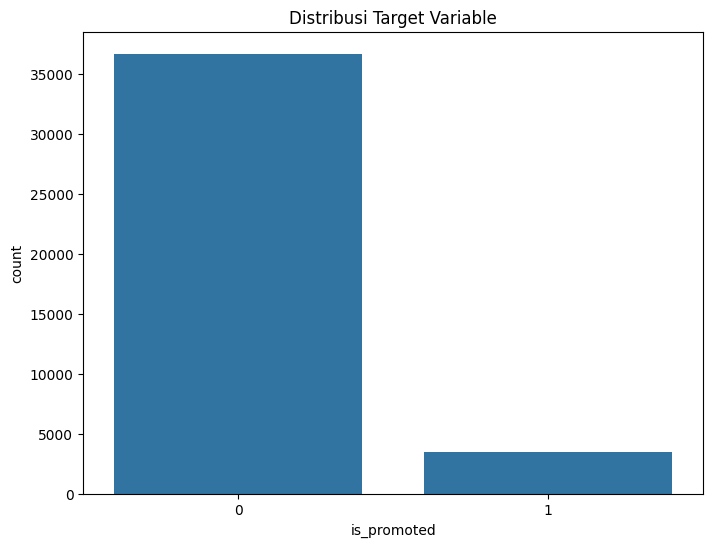

In [ ]:
# Melihat distribusi target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='is_promoted', data=train_data)
plt.title('Distribusi Target Variable')
plt.show()

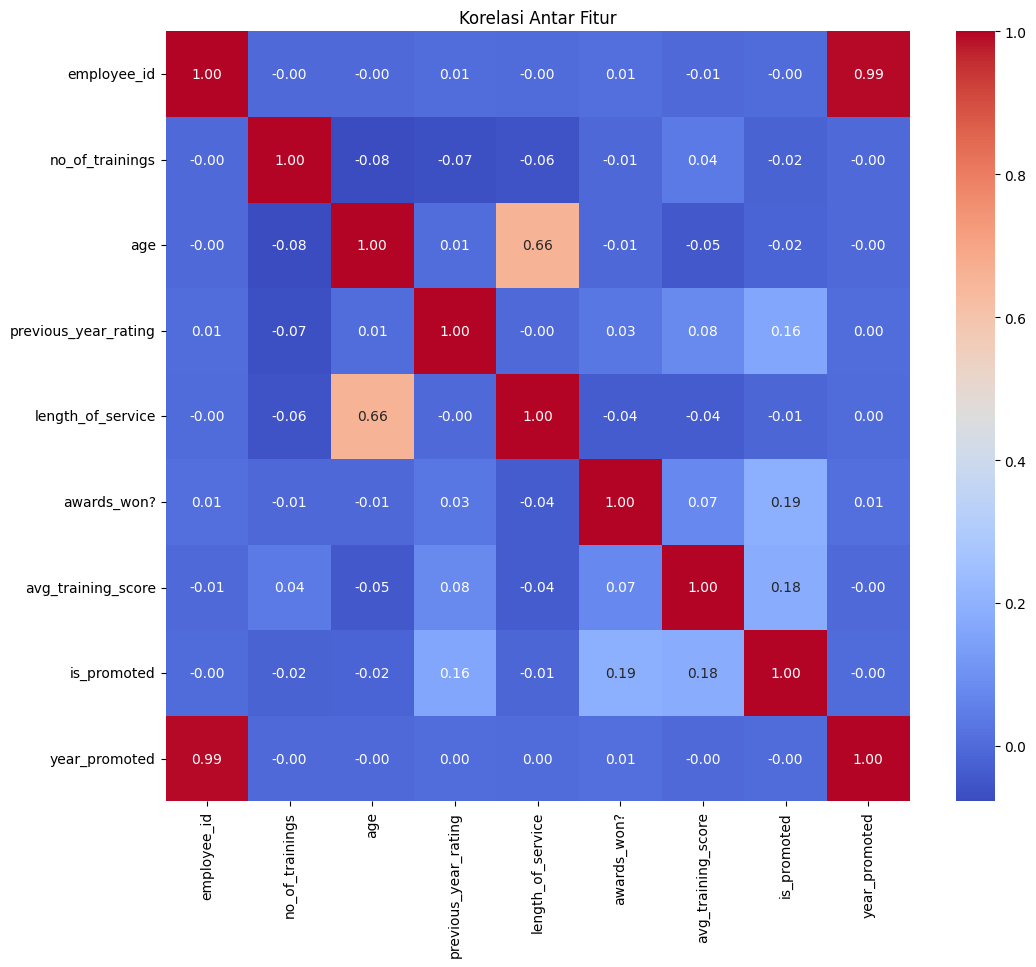

In [ ]:
# Melihat korelasi antar fitur
plt.figure(figsize=(12, 10))
# Select only numeric features for correlation calculation
numeric_data = train_data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur')
plt.show()

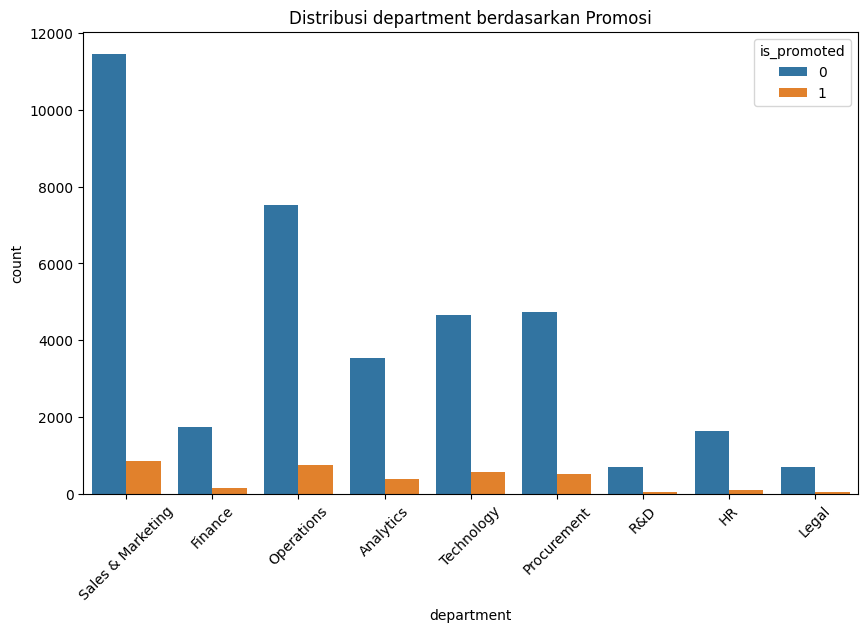

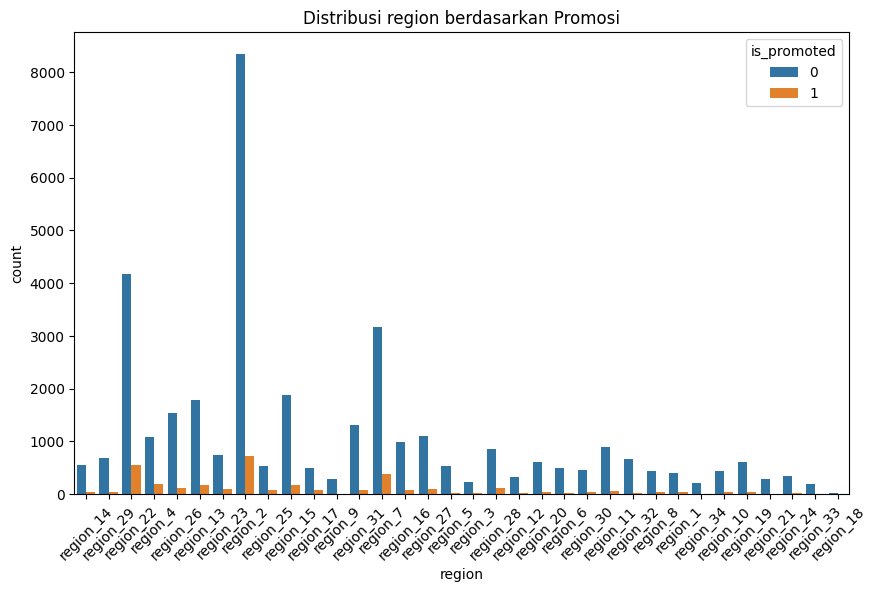

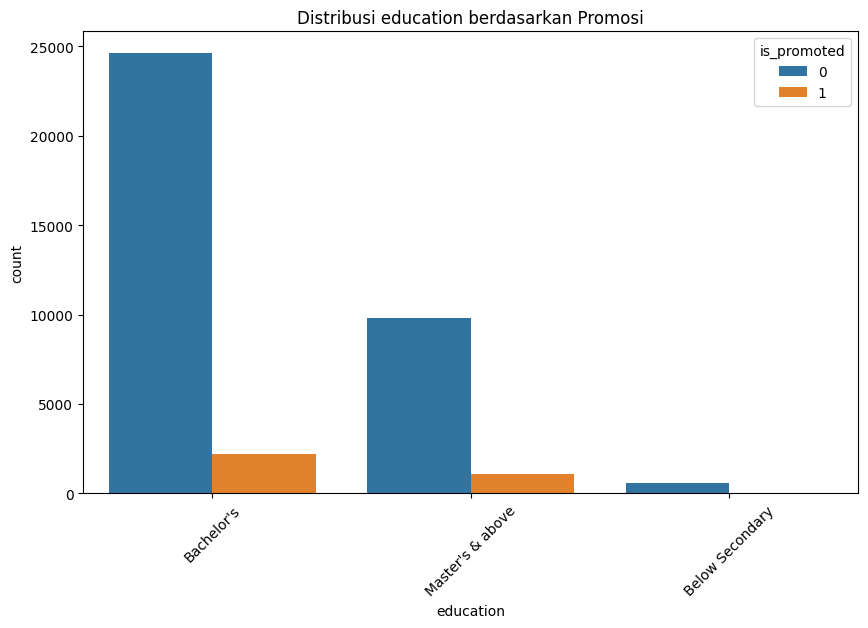

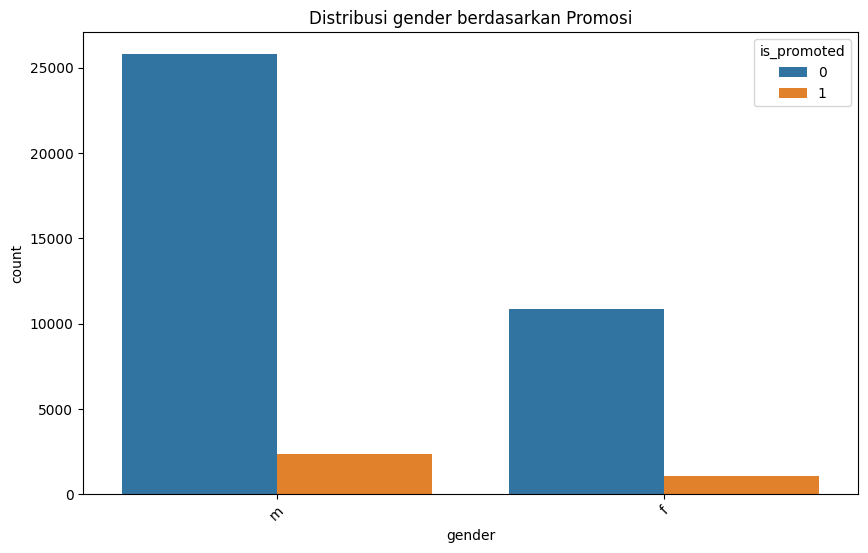

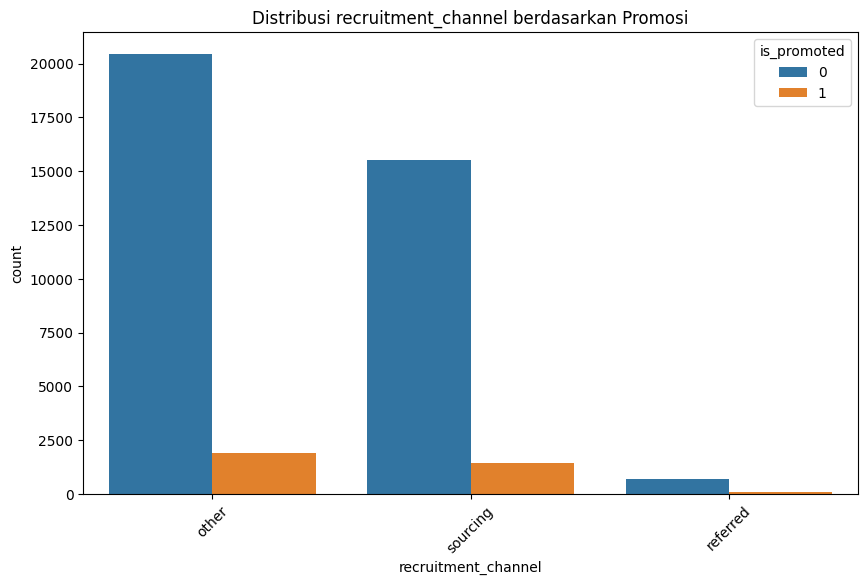

In [ ]:
# Analisis fitur kategorikal
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='is_promoted', data=train_data)
    plt.title(f'Distribusi {feature} berdasarkan Promosi')
    plt.xticks(rotation=45)
    plt.show()

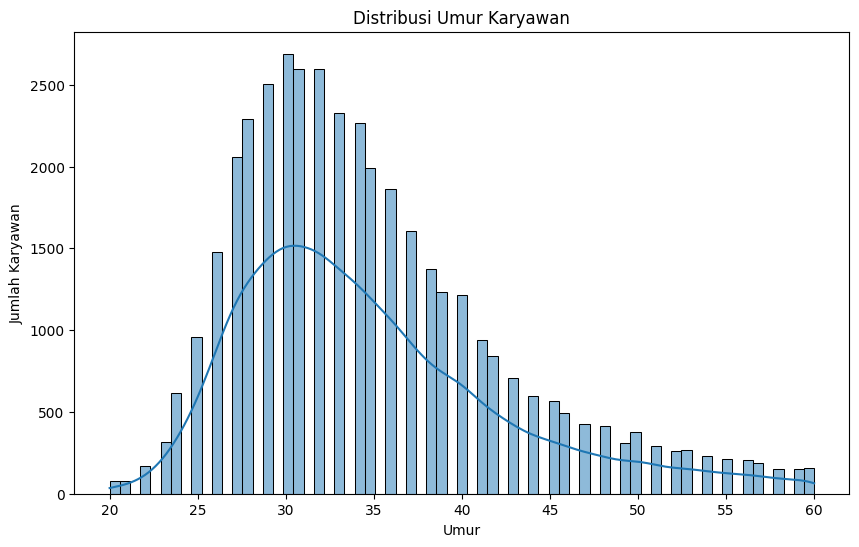

In [ ]:
# melihat distribusi umur karyawan
plt.figure(figsize=(10, 6))
sns.histplot(train_data['age'], kde=True)
plt.title('Distribusi Umur Karyawan')
plt.xlabel('Umur')
plt.ylabel('Jumlah Karyawan')
plt.show()

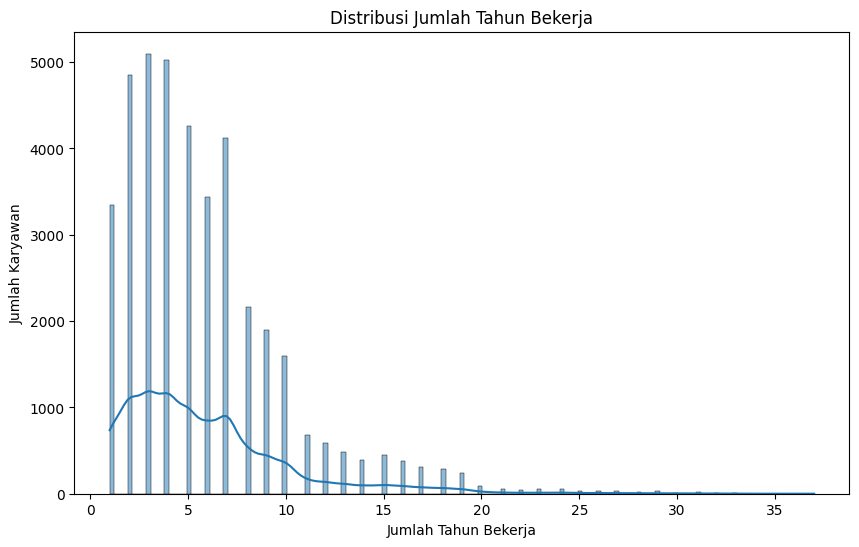

In [ ]:
# melihat distribusi jumlah tahun bekerja
plt.figure(figsize=(10, 6))
sns.histplot(train_data['length_of_service'], kde=True)
plt.title('Distribusi Jumlah Tahun Bekerja')
plt.xlabel('Jumlah Tahun Bekerja')
plt.ylabel('Jumlah Karyawan')
plt.show()

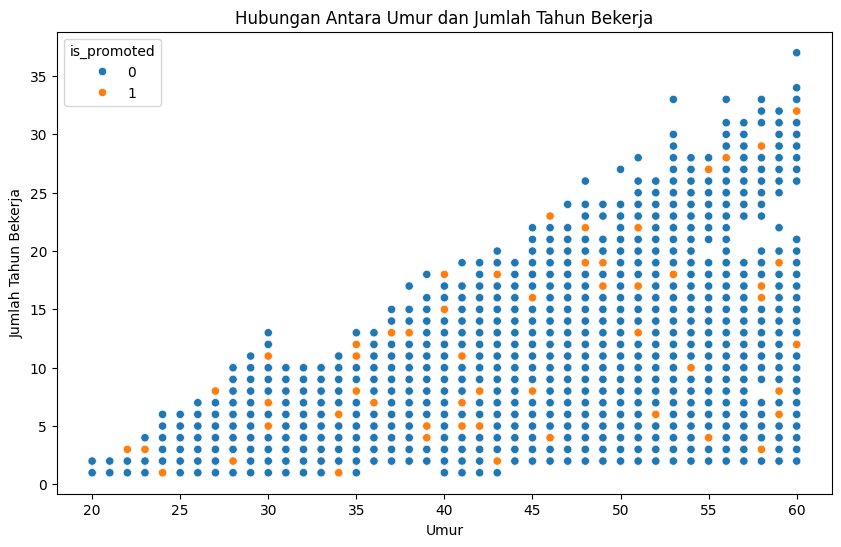

In [ ]:
# melihat hubungan antara umur dan jumlah tahun bekerja
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='length_of_service', hue='is_promoted', data=train_data)
plt.title('Hubungan Antara Umur dan Jumlah Tahun Bekerja')
plt.xlabel('Umur')
plt.ylabel('Jumlah Tahun Bekerja')
plt.show()

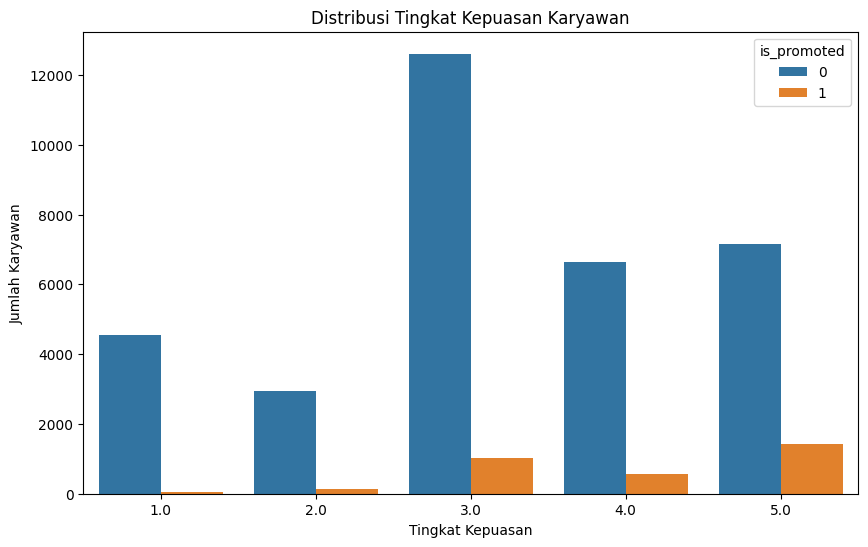

In [ ]:
# melihat distribusi tingkat kepuasan karyawan
plt.figure(figsize=(10, 6))
sns.countplot(x='previous_year_rating', hue='is_promoted', data=train_data)
plt.title('Distribusi Tingkat Kepuasan Karyawan')
plt.xlabel('Tingkat Kepuasan')
plt.ylabel('Jumlah Karyawan')
plt.show()

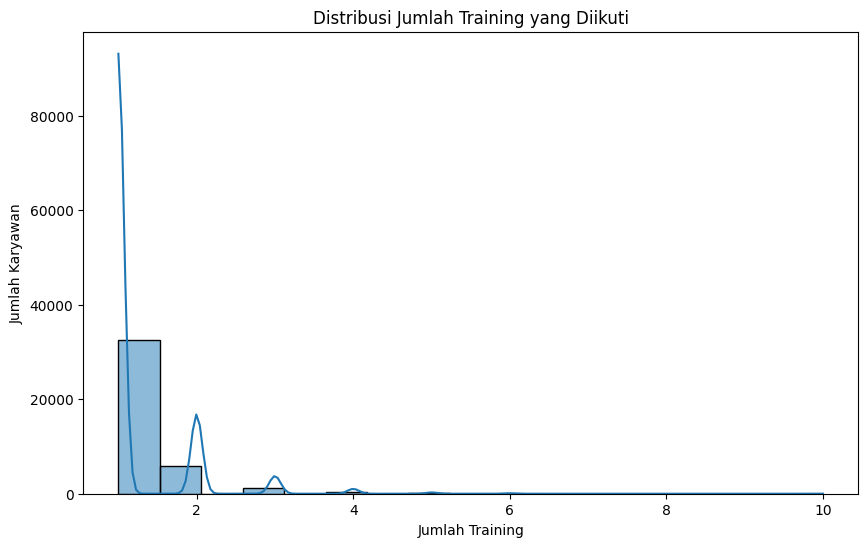

In [ ]:
# melihat distribusi jumlah training yang diikuti karyawan
plt.figure(figsize=(10, 6))
sns.histplot(train_data['no_of_trainings'], kde=True)
plt.title('Distribusi Jumlah Training yang Diikuti')
plt.xlabel('Jumlah Training')
plt.ylabel('Jumlah Karyawan')
plt.show()

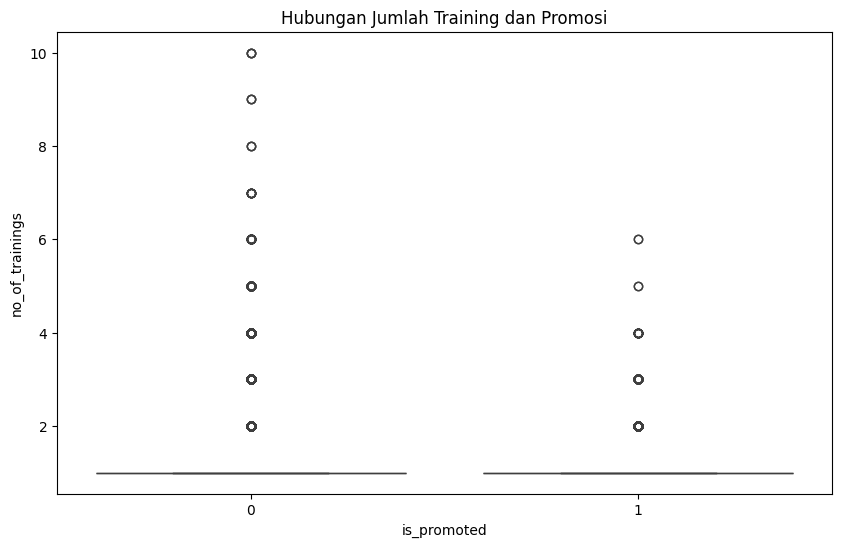

In [ ]:
# melihat hubungan antara jumlah training dan promosi
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_promoted', y='no_of_trainings', data=train_data)
plt.title('Hubungan Jumlah Training dan Promosi')
plt.show()

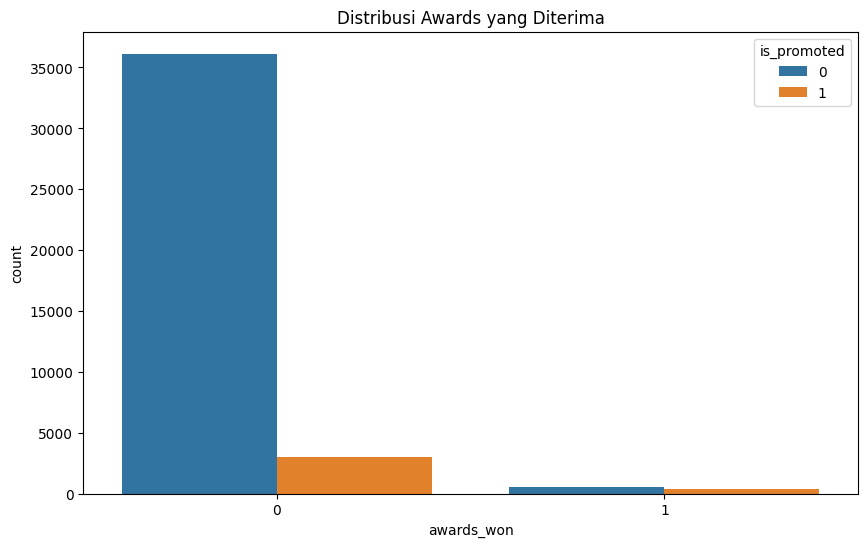

In [ ]:
# melihat distribusi awards yang diterima karyawan
plt.figure(figsize=(10,6))
# Check if 'awards_won?' is the correct column name. If not, replace it with the correct one.
# For example, if the column name is 'awards_won', change the following line to:
sns.countplot(x='awards_won', hue='is_promoted', data=train_data)
plt.title('Distribusi Awards yang Diterima')
plt.show()

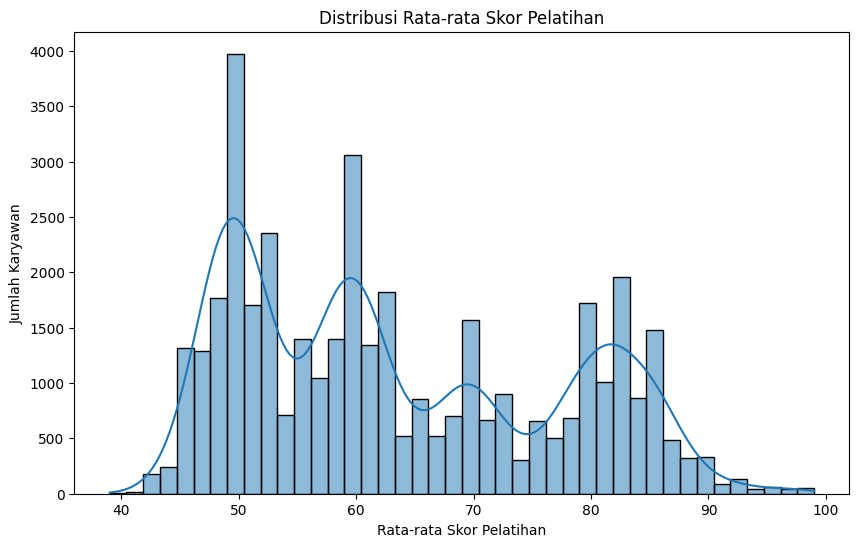

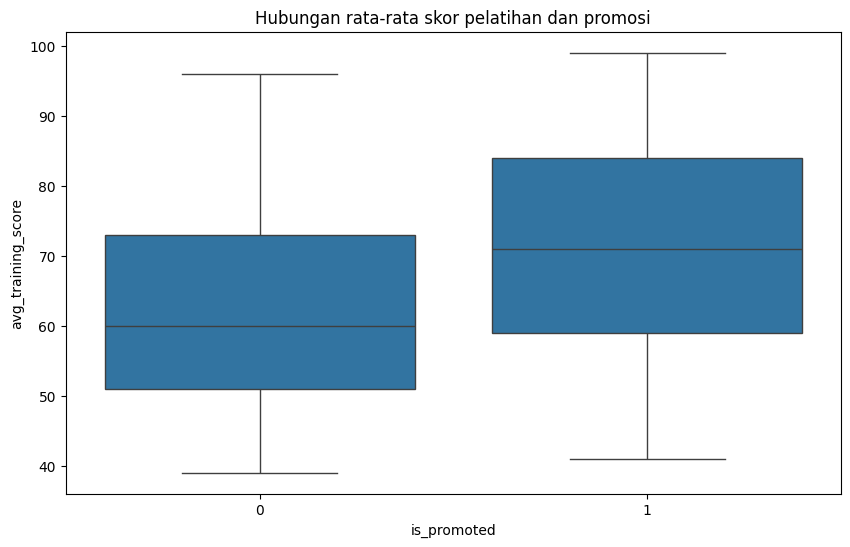

In [ ]:
# Analisis fitur numerik lainnya (avg_training_score)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['avg_training_score'], kde=True)
plt.title('Distribusi Rata-rata Skor Pelatihan')
plt.xlabel('Rata-rata Skor Pelatihan')
plt.ylabel('Jumlah Karyawan')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='is_promoted', y='avg_training_score', data=train_data)
plt.title('Hubungan rata-rata skor pelatihan dan promosi')
plt.show()

# Model Random Forest

In [ ]:
# Modeling menggunakan Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Evaluasi model
y_pred = model.predict(X_val)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7314
           1       0.82      0.26      0.39       706

    accuracy                           0.93      8020
   macro avg       0.88      0.63      0.68      8020
weighted avg       0.92      0.93      0.91      8020

Confusion Matrix:
[[7275   39]
 [ 524  182]]


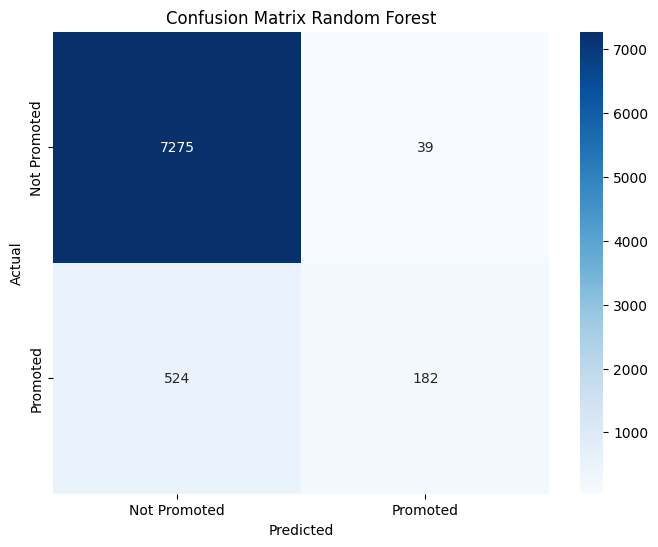

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_val and y_pred are already defined from your previous code
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Promoted', 'Promoted'],
            yticklabels=['Not Promoted', 'Promoted'])
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# Evaluasi model Logistic Regression
y_pred_logreg = logreg_model.predict(X_val)
print("Classification Report (Logistic Regression):")
print(classification_report(y_val, y_pred_logreg))
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_val, y_pred_logreg))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7314
           1       0.49      0.09      0.16       706

    accuracy                           0.91      8020
   macro avg       0.70      0.54      0.56      8020
weighted avg       0.88      0.91      0.88      8020

Confusion Matrix (Logistic Regression):
[[7245   69]
 [ 640   66]]


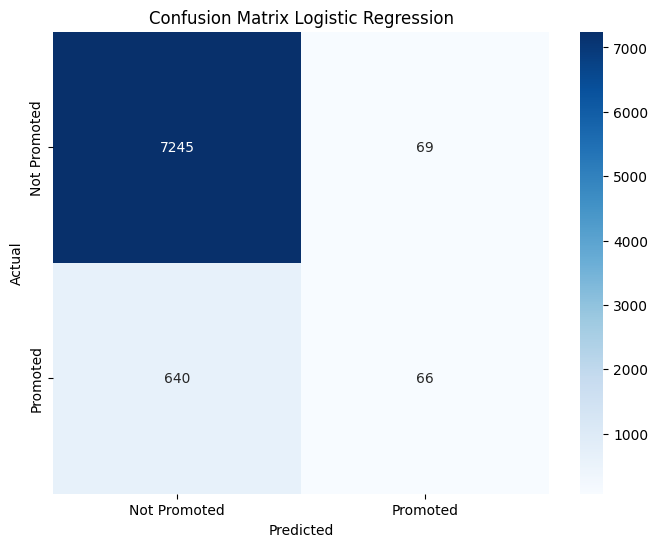

In [ ]:
# Plot Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_val, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Promoted', 'Promoted'],
            yticklabels=['Not Promoted', 'Promoted'])
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Modeling menggunakan Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluasi model Decision Tree
y_pred_tree = tree_model.predict(X_val)
print("Classification Report (Decision Tree):")
print(classification_report(y_val, y_pred_tree))
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_val, y_pred_tree))

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7314
           1       0.33      0.38      0.35       706

    accuracy                           0.88      8020
   macro avg       0.63      0.65      0.64      8020
weighted avg       0.89      0.88      0.88      8020

Confusion Matrix (Decision Tree):
[[6777  537]
 [ 441  265]]


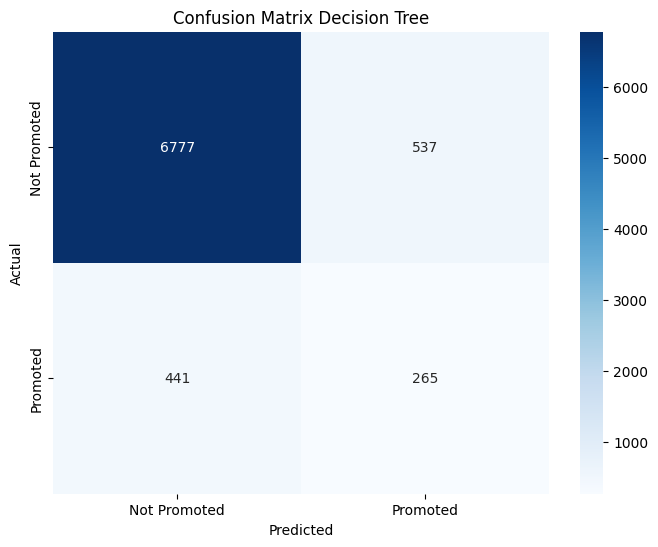

In [ ]:
# Plot Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_val, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Promoted', 'Promoted'],
            yticklabels=['Not Promoted', 'Promoted'])
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Predict data untuk 2024
predict_data['education'].fillna('Unknown', inplace=True)
for column in ['department', 'region', 'education', 'gender', 'recruitment_channel']:
    predict_data[column] = label_encoders[column].transform(predict_data[column])

X_predict = predict_data.drop(['employee_id'], axis=1)
predictions = model.predict(X_predict)

<ipython-input-114-2768233f2685>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  predict_data['education'].fillna('Unknown', inplace=True)


In [ ]:
# Menambahkan hasil prediksi ke dataset
predict_data['is_promoted'] = predictions

In [ ]:
# Menentukan department terbaik
top_departments = predict_data.groupby('department')['is_promoted'].sum().reset_index()
top_departments = top_departments.sort_values(by='is_promoted', ascending=False)


In [ ]:
# Menampilkan hasil analisis
print("Top Departments for Promotions:")
print(top_departments)

Top Departments for Promotions:
   department  is_promoted
7           7          139
4           4           86
8           8           79
0           0           51
5           5           49
1           1           20
6           6            8
3           3            6
2           2            3


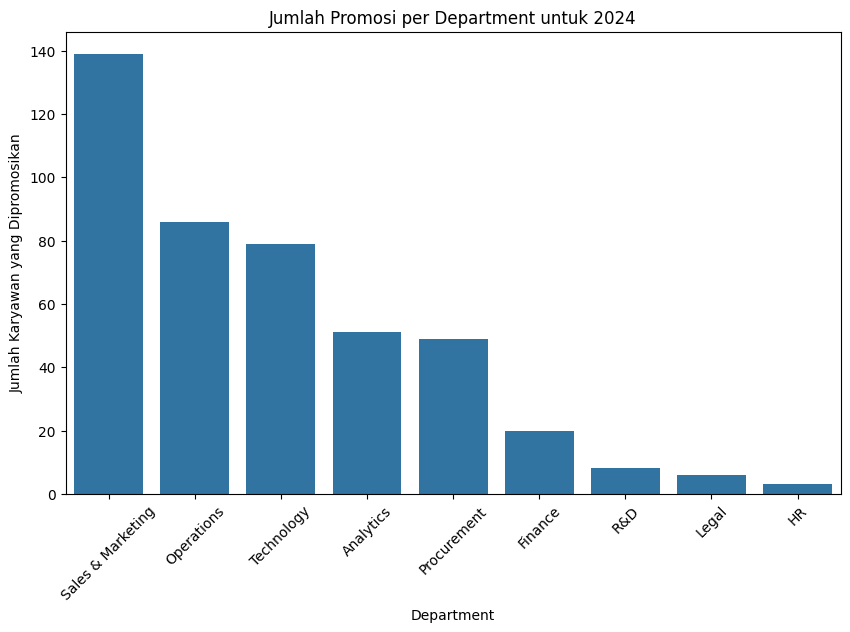

In [ ]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=top_departments, x='department', y='is_promoted')
plt.title('Jumlah Promosi per Department untuk 2024')
plt.xlabel('Department')
plt.ylabel('Jumlah Karyawan yang Dipromosikan')
plt.xticks(rotation=45)
plt.show()

## 1. Akurasi Prediksi Promosi

Seberapa akurat model prediksi kita dalam mengidentifikasi karyawan yang layak untuk dipromosikan?

Pertanyaan ini mengatasi efektivitas model dan dampaknya terhadap keputusan HR. Hal ini dapat mengarah pada diskusi tentang metrik kinerja model seperti akurasi, presisi, recall, dan skor F1.

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
train_data = pd.read_csv('/content/drive/MyDrive/0. Projek Qarir Academi/One Week Projek Machine Learning/train.csv')
predict_data = pd.read_csv('/content/drive/MyDrive/0. Projek Qarir Academi/One Week Projek Machine Learning/predict2024.csv')

In [ ]:
# Data Preparation
# Fill missing values and encode categorical variables as needed
train_data['education'].fillna('Unknown', inplace=True)
train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].mean(), inplace=True)


<ipython-input-121-61b8f754c246>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['education'].fillna('Unknown', inplace=True)
<ipython-input-121-61b8f754c246>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
# Convert categorical features to numerical using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['department', 'region', 'education', 'gender', 'recruitment_channel'], drop_first=True)


In [ ]:
# Define features (X) and target (y)
X = train_data.drop(columns=['employee_id', 'is_promoted'])
y = train_data['is_promoted']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
# Display the evaluation metrics
print("Akurasi: ", accuracy)
print("Presisi: ", precision)
print("Recall: ", recall)
print("Skor F1: ", f1)

Akurasi:  0.9300498753117207
Presisi:  0.8251121076233184
Recall:  0.26062322946175637
Skor F1:  0.3961248654467169


In [ ]:
# Detailed classification report
print("\nClassification Report Random Forest:\n", classification_report(y_test, y_pred))



Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7314
           1       0.83      0.26      0.40       706

    accuracy                           0.93      8020
   macro avg       0.88      0.63      0.68      8020
weighted avg       0.92      0.93      0.91      8020



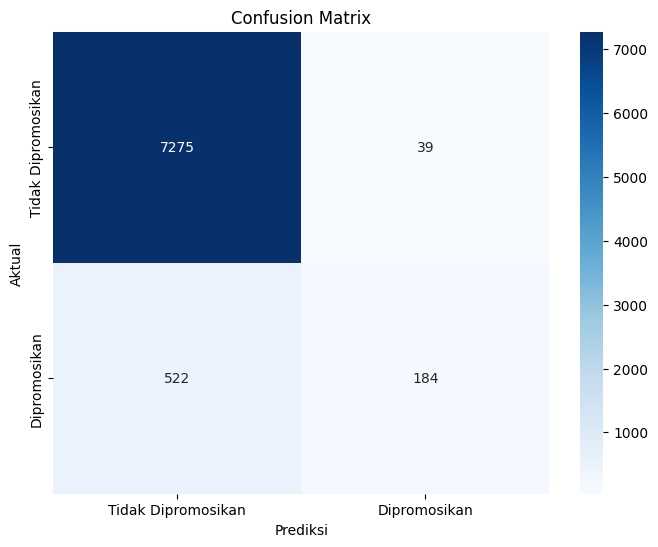

In [ ]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Dipromosikan', 'Dipromosikan'], yticklabels=['Tidak Dipromosikan', 'Dipromosikan'])
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.title('Confusion Matrix')
plt.show()

# 2. Fitur Kunci yang Mempengaruhi Promosi

Fitur apa yang memiliki dampak paling signifikan dalam memprediksi promosi karyawan?

Memahami faktor-faktor (misalnya, lama bekerja, penilaian tahun sebelumnya, jumlah pelatihan) yang paling berkontribusi pada keputusan promosi dapat membantu HR memprioritaskan program pengembangan dan menilai efektivitasnya.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
train_data = pd.read_csv('/content/drive/MyDrive/0. Projek Qarir Academi/One Week Projek Machine Learning/train.csv')

In [ ]:
# Data Preparation
# Fill missing values and encode categorical variables as needed
train_data['education'].fillna('Unknown', inplace=True)
train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].mean(), inplace=True)


<ipython-input-134-61b8f754c246>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['education'].fillna('Unknown', inplace=True)
<ipython-input-134-61b8f754c246>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
# Convert categorical features to numerical using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['department', 'region', 'education', 'gender', 'recruitment_channel'], drop_first=True)


In [ ]:
# Define features (X) and target (y)
X = train_data.drop(columns=['employee_id', 'is_promoted'])
y = train_data['is_promoted']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Feature Importance
feature_importances = model.feature_importances_
features = X.columns

In [ ]:
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


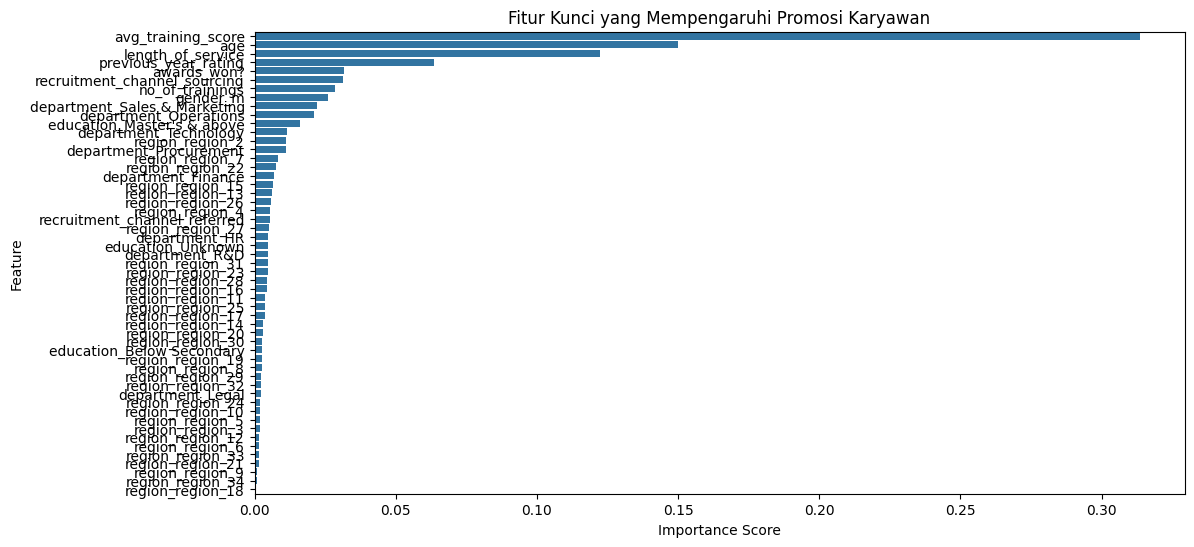

In [ ]:
# Plotting the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Fitur Kunci yang Mempengaruhi Promosi Karyawan')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# 3. Kinerja Departemen

Departemen mana yang kemungkinan akan memiliki jumlah promosi tertinggi di tahun 2024, dan faktor apa yang berkontribusi pada keberhasilan mereka?

Pertanyaan ini dapat memandu keputusan strategis tentang penghargaan untuk departemen yang berkinerja terbaik dan menyelaraskan tujuan organisasi dengan pencapaian departemen.

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
train_data = pd.read_csv('/content/drive/MyDrive/0. Projek Qarir Academi/One Week Projek Machine Learning/train.csv')

In [ ]:
# Data Preparation
# Mengisi nilai yang hilang (jika diperlukan)
train_data['education'].fillna('Unknown', inplace=True)
train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].mean(), inplace=True)


<ipython-input-144-d0fc28d75511>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['education'].fillna('Unknown', inplace=True)
<ipython-input-144-d0fc28d75511>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
# Hitung jumlah promosi per departemen
promotion_count = train_data.groupby('department')['is_promoted'].sum().reset_index()


In [ ]:
# Hitung total karyawan per departemen
total_employees = train_data['department'].value_counts().reset_index()
total_employees.columns = ['department', 'total_employees']


In [ ]:
# Gabungkan data promosi dan total karyawan
department_performance = pd.merge(promotion_count, total_employees, on='department')
department_performance['promotion_rate'] = department_performance['is_promoted'] / department_performance['total_employees']


<ipython-input-148-0d5b3fac4a2c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='is_promoted', data=department_performance, palette='viridis')


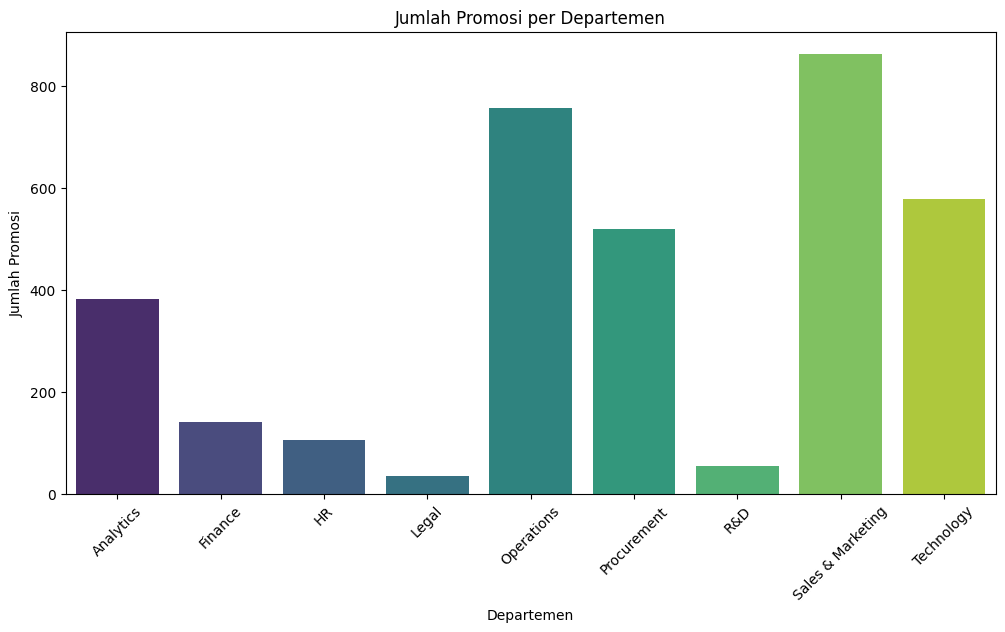

In [ ]:
# Visualisasi Kinerja Departemen
plt.figure(figsize=(12, 6))
sns.barplot(x='department', y='is_promoted', data=department_performance, palette='viridis')
plt.title('Jumlah Promosi per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Jumlah Promosi')
plt.xticks(rotation=45)
plt.show()

<ipython-input-149-5c6c58b73357>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='promotion_rate', data=department_performance, palette='viridis')


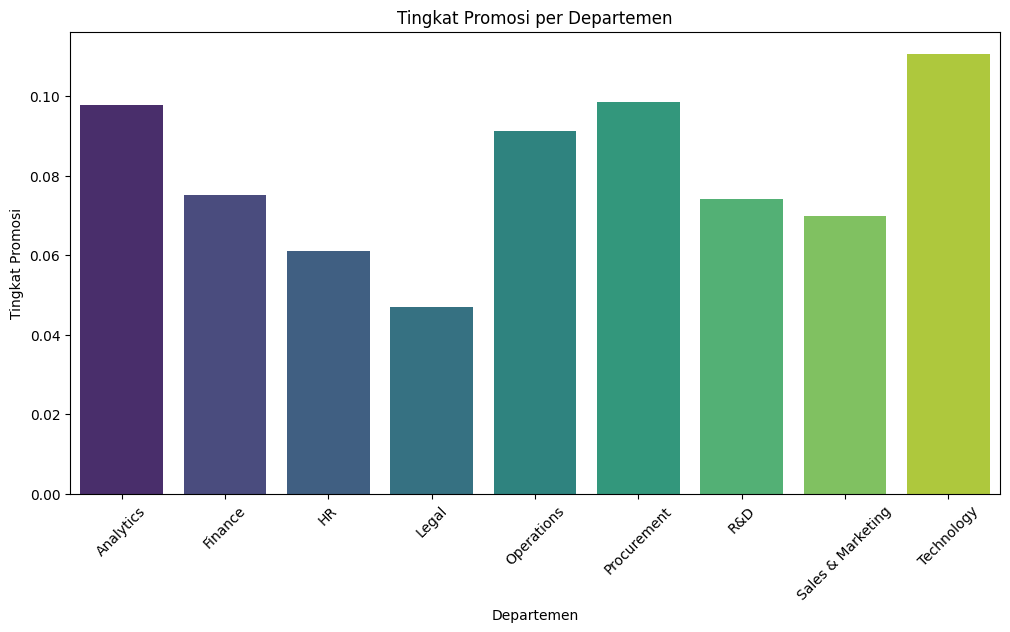

In [ ]:
# Visualisasi Tingkat Promosi per Departemen
plt.figure(figsize=(12, 6))
sns.barplot(x='department', y='promotion_rate', data=department_performance, palette='viridis')
plt.title('Tingkat Promosi per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Tingkat Promosi')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Menampilkan informasi kinerja departemen
print(department_performance)

          department  is_promoted  total_employees  promotion_rate
0          Analytics          383             3917        0.097779
1            Finance          141             1872        0.075321
2                 HR          106             1737        0.061025
3              Legal           35              743        0.047106
4         Operations          756             8275        0.091360
5        Procurement          519             5260        0.098669
6                R&D           55              742        0.074124
7  Sales & Marketing          863            12325        0.070020
8         Technology          579             5229        0.110729


In [ ]:
# Menampilkan informasi kinerja departemen
department_performance.head(10)

,department,is_promoted,total_employees,promotion_rate
0,Analytics,383,3917,0.097779
1,Finance,141,1872,0.075321
2,HR,106,1737,0.061025
3,Legal,35,743,0.047106
4,Operations,756,8275,0.091360
5,Procurement,519,5260,0.098669
6,R&D,55,742,0.074124
7,Sales & Marketing,863,12325,0.070020
8,Technology,579,5229,0.110729


# 4. Wawasan Demografis

Apakah terdapat bias demografis (misalnya, usia, jenis kelamin, pendidikan) dalam prediksi promosi?

Menyelidiki potensi bias dalam promosi dapat membantu memastikan keadilan dan kesetaraan dalam praktik HR, yang pada gilirannya dapat meningkatkan kepuasan dan retensi karyawan.

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
train_data = pd.read_csv('/content/drive/MyDrive/0. Projek Qarir Academi/One Week Projek Machine Learning/train.csv')

In [ ]:
# Data Preparation
# Mengisi nilai yang hilang (jika diperlukan)
train_data['education'].fillna('Unknown', inplace=True)
train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].mean(), inplace=True)


<ipython-input-155-d0fc28d75511>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['education'].fillna('Unknown', inplace=True)
<ipython-input-155-d0fc28d75511>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

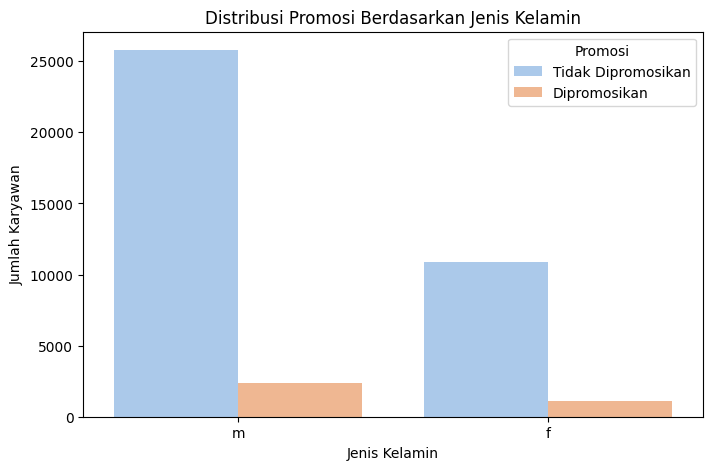

In [ ]:
# Visualisasi Bias Jenis Kelamin
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='gender', hue='is_promoted', palette='pastel')
plt.title('Distribusi Promosi Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Karyawan')
plt.legend(title='Promosi', labels=['Tidak Dipromosikan', 'Dipromosikan'])
plt.show()

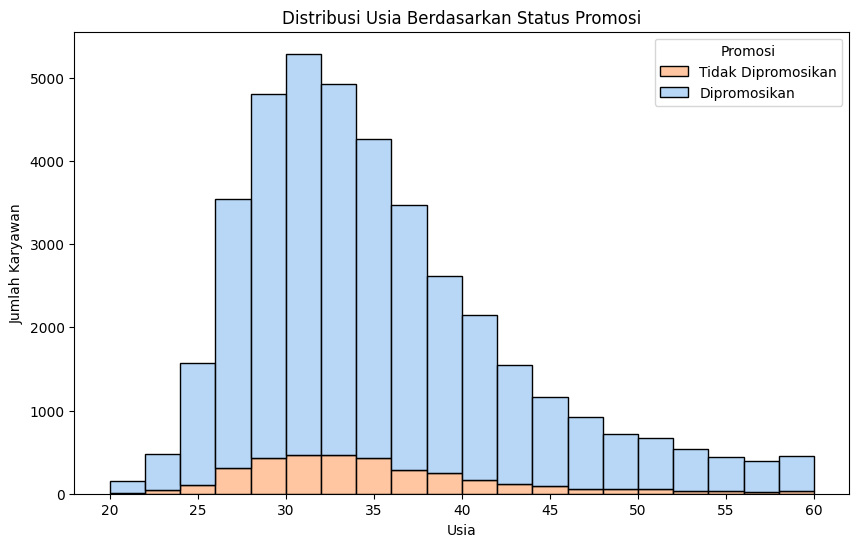

In [ ]:
# Visualisasi Bias Usia
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='age', hue='is_promoted', multiple='stack', bins=20, palette='pastel')
plt.title('Distribusi Usia Berdasarkan Status Promosi')
plt.xlabel('Usia')
plt.ylabel('Jumlah Karyawan')
plt.legend(title='Promosi', labels=['Tidak Dipromosikan', 'Dipromosikan'])
plt.show()

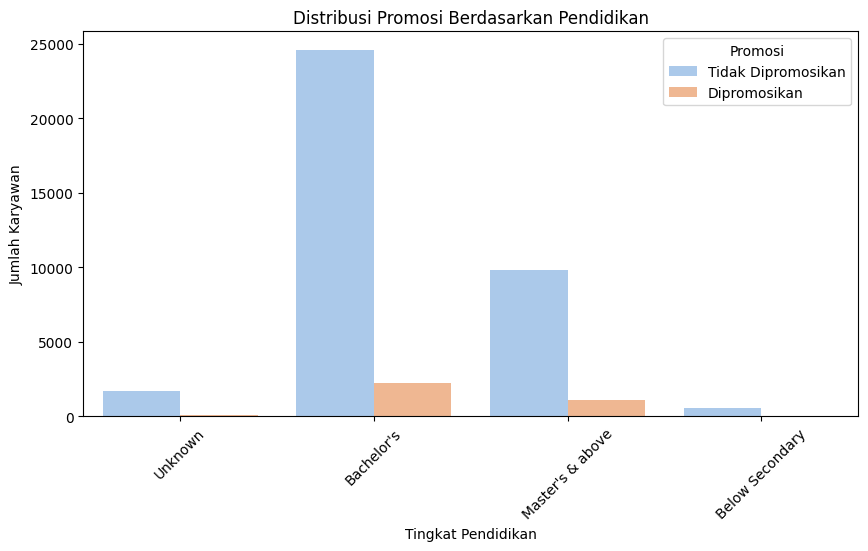

In [ ]:
# Visualisasi Bias Pendidikan
plt.figure(figsize=(10, 5))
sns.countplot(data=train_data, x='education', hue='is_promoted', palette='pastel')
plt.title('Distribusi Promosi Berdasarkan Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Karyawan')
plt.legend(title='Promosi', labels=['Tidak Dipromosikan', 'Dipromosikan'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Menganalisis Bias Demografis Secara Kuantitatif
demographic_analysis = train_data.groupby(['gender', 'is_promoted']).size().unstack().fillna(0)
demographic_analysis_percentage = demographic_analysis.div(demographic_analysis.sum(axis=1), axis=0) * 100

print("Persentase Promosi Berdasarkan Jenis Kelamin:")
print(demographic_analysis_percentage)

Persentase Promosi Berdasarkan Jenis Kelamin:
is_promoted          0         1
gender                          
f            91.019417  8.980583
m            91.602728  8.397272


In [ ]:
age_analysis = train_data.groupby(['age', 'is_promoted']).size().unstack().fillna(0)
age_analysis_percentage = age_analysis.div(age_analysis.sum(axis=1), axis=0) * 100

print("\nPersentase Promosi Berdasarkan Usia:")
print(age_analysis_percentage)


Persentase Promosi Berdasarkan Usia:
is_promoted          0          1
age                              
20           94.871795   5.128205
21           94.736842   5.263158
22           91.616766   8.383234
23           91.772152   8.227848
24           92.195122   7.804878
25           94.166667   5.833333
26           91.891892   8.108108
27           91.054934   8.945066
28           90.449193   9.550807
29           91.380686   8.619314
30           91.003717   8.996283
31           91.185527   8.814473
32           91.108545   8.891455
33           90.150538   9.849462
34           90.215954   9.784046
35           89.669007  10.330993
36           92.047286   7.952714
37           91.339564   8.660436
38           90.188953   9.811047
39           90.526316   9.473684
40           92.745260   7.254740
41           91.462113   8.537887
42           93.586698   6.413302
43           91.937765   8.062235
44           91.666667   8.333333
45           92.957746   7.042254
46        

In [ ]:
education_analysis = train_data.groupby(['education', 'is_promoted']).size().unstack().fillna(0)
education_analysis_percentage = education_analysis.div(education_analysis.sum(axis=1), axis=0) * 100

print("\nPersentase Promosi Berdasarkan Pendidikan:")
print(education_analysis_percentage)


Persentase Promosi Berdasarkan Pendidikan:
is_promoted               0         1
education                            
Bachelor's        91.698352  8.301648
Below Secondary   91.900826  8.099174
Master's & above  90.129346  9.870654
Unknown           95.192308  4.807692


# 5. Efektivitas Pelatihan

Bagaimana jumlah pelatihan dan skor rata-rata pelatihan berkorelasi dengan kemungkinan promosi?

Analisis ini dapat membantu HR menentukan apakah program pelatihan efektif dalam mempersiapkan karyawan untuk promosi dan di mana perbaikan mungkin diperlukan.

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
train_data = pd.read_csv('/content/drive/MyDrive/0. Projek Qarir Academi/One Week Projek Machine Learning/train.csv')

In [ ]:
# Data Preparation
# Mengisi nilai yang hilang jika diperlukan
train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].mean(), inplace=True)


<ipython-input-165-31079d6477da>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].mean(), inplace=True)


In [ ]:
# Analisis Korelasi
correlation = train_data[['no_of_trainings', 'avg_training_score', 'is_promoted']].corr()
print("Matriks Korelasi:")
print(correlation)

Matriks Korelasi:
                    no_of_trainings  avg_training_score  is_promoted
no_of_trainings            1.000000            0.037278    -0.022331
avg_training_score         0.037278            1.000000     0.182636
is_promoted               -0.022331            0.182636     1.000000


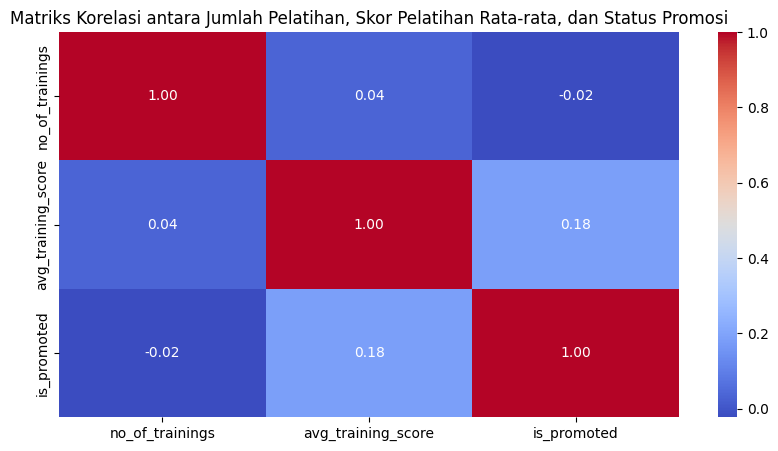

In [ ]:
# Visualisasi Korelasi
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi antara Jumlah Pelatihan, Skor Pelatihan Rata-rata, dan Status Promosi')
plt.show()

<ipython-input-168-a3996fc391fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='no_of_trainings', y='is_promoted', palette='pastel')


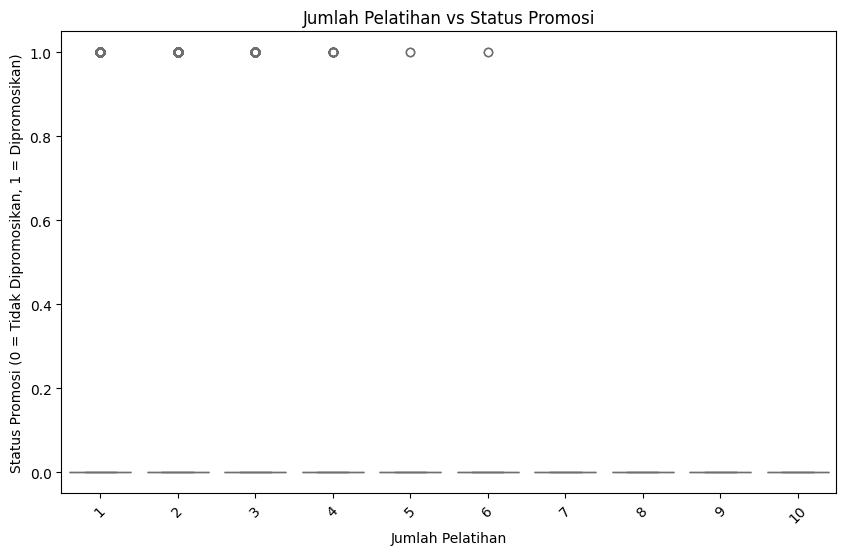

In [ ]:
# Visualisasi Jumlah Pelatihan terhadap Status Promosi
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='no_of_trainings', y='is_promoted', palette='pastel')
plt.title('Jumlah Pelatihan vs Status Promosi')
plt.xlabel('Jumlah Pelatihan')
plt.ylabel('Status Promosi (0 = Tidak Dipromosikan, 1 = Dipromosikan)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-169-098a32ef11d4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='avg_training_score', y='is_promoted', palette='pastel')


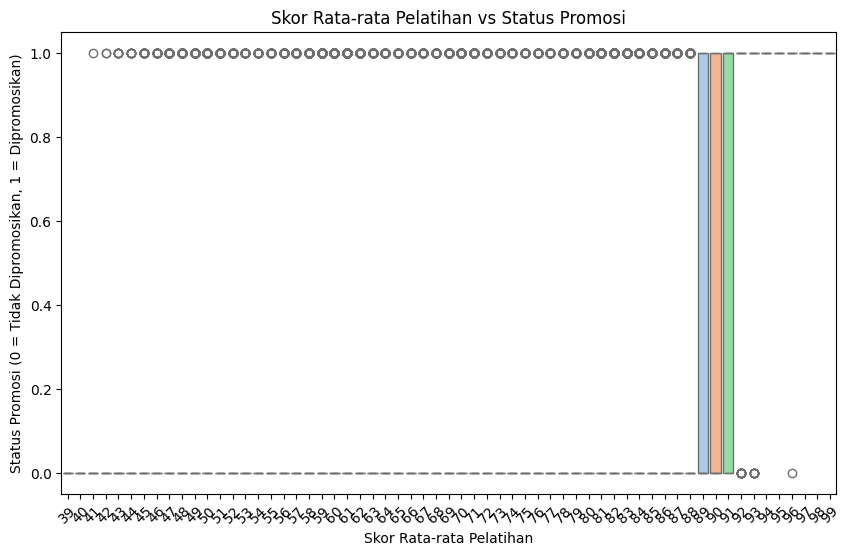

In [ ]:
# Visualisasi Skor Pelatihan Rata-rata terhadap Status Promosi
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='avg_training_score', y='is_promoted', palette='pastel')
plt.title('Skor Rata-rata Pelatihan vs Status Promosi')
plt.xlabel('Skor Rata-rata Pelatihan')
plt.ylabel('Status Promosi (0 = Tidak Dipromosikan, 1 = Dipromosikan)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Analisis Rata-rata dan Median
avg_trainings_promoted = train_data[train_data['is_promoted'] == 1]['no_of_trainings'].mean()
avg_trainings_not_promoted = train_data[train_data['is_promoted'] == 0]['no_of_trainings'].mean()
print(f"Rata-rata Jumlah Pelatihan Karyawan yang Dipromosikan: {avg_trainings_promoted:.2f}")
print(f"Rata-rata Jumlah Pelatihan Karyawan yang Tidak Dipromosikan: {avg_trainings_not_promoted:.2f}")



Rata-rata Jumlah Pelatihan Karyawan yang Dipromosikan: 1.21
Rata-rata Jumlah Pelatihan Karyawan yang Tidak Dipromosikan: 1.26


In [ ]:
avg_training_score_promoted = train_data[train_data['is_promoted'] == 1]['avg_training_score'].mean()
avg_training_score_not_promoted = train_data[train_data['is_promoted'] == 0]['avg_training_score'].mean()
print(f"Rata-rata Skor Pelatihan Karyawan yang Dipromosikan: {avg_training_score_promoted:.2f}")
print(f"Rata-rata Skor Pelatihan Karyawan yang Tidak Dipromosikan: {avg_training_score_not_promoted:.2f}")

Rata-rata Skor Pelatihan Karyawan yang Dipromosikan: 71.39
Rata-rata Skor Pelatihan Karyawan yang Tidak Dipromosikan: 62.66


# 6.  Dampak Penghargaan pada Promosi

Apakah karyawan yang memiliki penghargaan memiliki kemungkinan yang lebih tinggi untuk mendapatkan promosi? Jika ya, seberapa besar kemungkinan mereka untuk dipromosikan dibandingkan dengan yang tidak memiliki penghargaan?

Memahami hubungan antara penghargaan dan promosi dapat membantu HR mengenali dan memberi insentif kepada para pelaku terbaik secara efektif.

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
train_data = pd.read_csv('/content/drive/MyDrive/0. Projek Qarir Academi/One Week Projek Machine Learning/train.csv')

In [ ]:
# Data Preparation
# Mengisi nilai yang hilang jika diperlukan
train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].mean(), inplace=True)


<ipython-input-174-31079d6477da>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].mean(), inplace=True)


In [ ]:
# Menghitung proporsi promosi berdasarkan penghargaan
awards_promoted = train_data[train_data['awards_won?'] == 1]['is_promoted'].value_counts(normalize=True)
awards_not_promoted = train_data[train_data['awards_won?'] == 0]['is_promoted'].value_counts(normalize=True)


In [ ]:
# Membuat DataFrame untuk memudahkan visualisasi
awards_data = pd.DataFrame({
    'With Award': awards_promoted,
    'Without Award': awards_not_promoted
}).fillna(0)


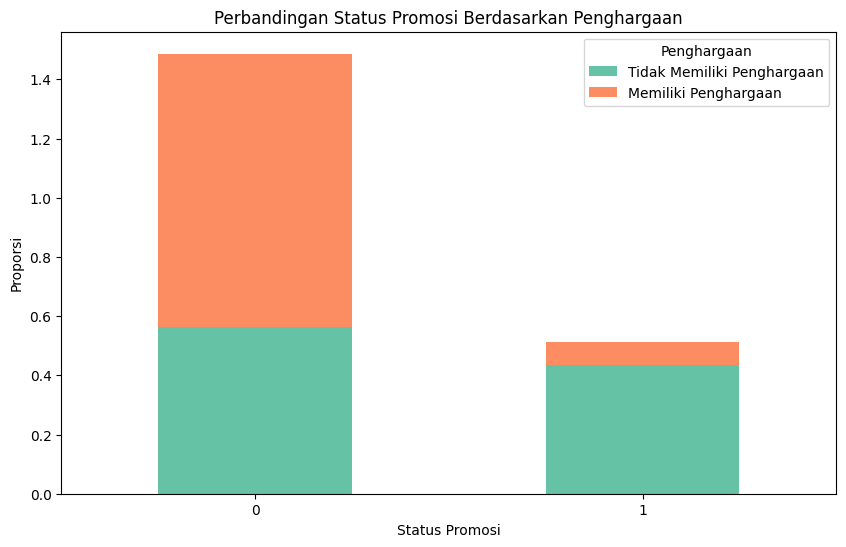

In [ ]:
# Visualisasi
awards_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66c2a5', '#fc8d62'])
plt.title('Perbandingan Status Promosi Berdasarkan Penghargaan')
plt.xlabel('Status Promosi')
plt.ylabel('Proporsi')
plt.xticks(rotation=0)
plt.legend(title='Penghargaan', labels=['Tidak Memiliki Penghargaan', 'Memiliki Penghargaan'])
plt.show()

In [ ]:
# Menghitung kemungkinan dipromosikan
promoted_with_award = awards_data.loc[1, 'With Award'] * 100
promoted_without_award = awards_data.loc[1, 'Without Award'] * 100

print(f"Persentase Karyawan yang Dipromosikan dengan Penghargaan: {promoted_with_award:.2f}%")
print(f"Persentase Karyawan yang Dipromosikan tanpa Penghargaan: {promoted_without_award:.2f}%")


Persentase Karyawan yang Dipromosikan dengan Penghargaan: 43.62%
Persentase Karyawan yang Dipromosikan tanpa Penghargaan: 7.73%


In [ ]:
# Membedakan jumlah karyawan
total_with_award = train_data[train_data['awards_won?'] == 1].shape[0]
total_without_award = train_data[train_data['awards_won?'] == 0].shape[0]


In [ ]:
# Menghitung kemungkinan
probability_with_award = promoted_with_award / (promoted_with_award + promoted_without_award)
print(f"Probabilitas Karyawan yang Memiliki Penghargaan untuk Dipromosikan: {probability_with_award:.2f}")

Probabilitas Karyawan yang Memiliki Penghargaan untuk Dipromosikan: 0.85


# 7. Tren Promosi dari Waktu ke Waktu

Tren apa yang dapat diamati dalam promosi selama beberapa tahun terakhir, dan bagaimana tren ini dapat memengaruhi strategi HR di masa depan?

Menganalisis data promosi historis dapat memberikan wawasan tentang pertumbuhan organisasi dan area di mana dukungan tambahan mungkin diperlukan bagi karyawan.

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
train_data = pd.read_csv('/content/drive/MyDrive/0. Projek Qarir Academi/One Week Projek Machine Learning/train.csv')

In [ ]:
# Data Preparation
# Mengasumsikan ada kolom 'year_promoted' dalam dataset yang menunjukkan tahun promosi
# Jika tidak ada, kita perlu menambahkan atau memodifikasi data sesuai dengan kebutuhan
# Misalkan kita menggunakan tahun dari kolom 'employee_id' untuk ilustrasi
# Kita akan menganggap bahwa setiap ID karyawan baru mulai dari 2018 untuk keperluan ini

train_data['year_promoted'] = 2018 + (train_data['employee_id'] // 10000)  # Asumsi tahun berdasarkan ID karyawan


In [ ]:
# Menghitung jumlah promosi per tahun
promotions_per_year = train_data.groupby('year_promoted')['is_promoted'].sum().reset_index()


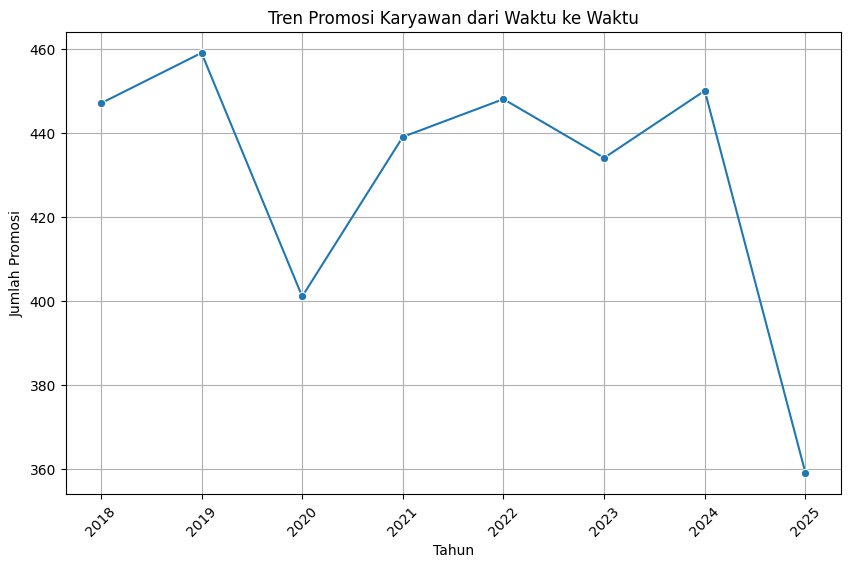

In [ ]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.lineplot(data=promotions_per_year, x='year_promoted', y='is_promoted', marker='o')
plt.title('Tren Promosi Karyawan dari Waktu ke Waktu')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Promosi')
plt.xticks(promotions_per_year['year_promoted'], rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Menganalisis dampak tren terhadap strategi HR
# Menampilkan informasi tambahan untuk analisis lebih lanjut
print(promotions_per_year)

   year_promoted  is_promoted
0           2018          447
1           2019          459
2           2020          401
3           2021          439
4           2022          448
5           2023          434
6           2024          450
7           2025          359


# 8. Tiga Departemen Teratas untuk Penghargaan

Berdasarkan prediksi promosi, departemen mana yang seharusnya menerima penghargaan atas kinerja luar biasa di tahun 2024?

 Mengidentifikasi departemen yang berkinerja terbaik akan memungkinkan HR untuk mengalokasikan penghargaan secara efektif, mendorong budaya keunggulan dan motivasi di dalam organisasi

In [ ]:
# Import library
import pandas as pd

In [ ]:
# Load data
predict_data = pd.read_csv('/content/drive/MyDrive/0. Projek Qarir Academi/One Week Projek Machine Learning/predict2024.csv')

In [ ]:
# Data Preparation
# Menghitung jumlah promosi yang diprediksi untuk setiap departemen
# Misalkan kita menggunakan kolom 'predicted_promoted' untuk menunjukkan prediksi promosi
# Kita perlu menambahkan kolom ini terlebih dahulu, misalnya berdasarkan model yang telah dibuat

# Contoh: Jika model prediksi kita menghasilkan kolom 'predicted_promoted' di predict_data
# (Untuk keperluan ilustrasi, kita asumsikan kolom tersebut sudah ada)


In [ ]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14707 entries, 0 to 14706
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           14707 non-null  int64  
 1   department            14707 non-null  object 
 2   region                14707 non-null  object 
 3   education             14066 non-null  object 
 4   gender                14707 non-null  object 
 5   recruitment_channel   14707 non-null  object 
 6   no_of_trainings       14707 non-null  int64  
 7   age                   14707 non-null  int64  
 8   previous_year_rating  13607 non-null  float64
 9   length_of_service     14707 non-null  int64  
 10  awards_won?           14707 non-null  int64  
 11  avg_training_score    14707 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.3+ MB


In [ ]:
# Siapkan data untuk prediksi
# Menangani nilai hilang dan encoding
predict_data['education'].fillna('Unknown', inplace=True)  # Menangani nilai hilang
X_predict = predict_data.drop(columns=['employee_id'])
X_predict = pd.get_dummies(X_predict, drop_first=True)


<ipython-input-190-e9be2f408c26>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  predict_data['education'].fillna('Unknown', inplace=True)  # Menangani nilai hilang


In [ ]:
# Pastikan semua kolom pada data prediksi cocok dengan kolom pada data pelatihan
X_predict = X_predict.reindex(columns=X.columns, fill_value=0)


In [ ]:
# Melakukan prediksi
predict_data['predicted_promoted'] = model.predict(X_predict)

In [ ]:
# Tampilkan beberapa baris dari data prediksi untuk memastikan kolom ditambahkan
print(predict_data.head())

   employee_id         department     region   education gender  \
0         3387        Procurement  region_15  Bachelor's      f   
1        67479  Sales & Marketing   region_7  Bachelor's      m   
2         8070         Operations  region_13  Bachelor's      f   
3        46497          Analytics  region_26  Bachelor's      m   
4        54990         Operations  region_28  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0               other                1   36                   3.0   
1            sourcing                2   31                   5.0   
2            sourcing                1   40                   3.0   
3               other                1   31                   1.0   
4            sourcing                1   24                   NaN   

   length_of_service  awards_won?  avg_training_score  predicted_promoted  
0                  3            0                  69                   0  
1                  4          

In [ ]:
# Hitung jumlah promosi yang diprediksi untuk setiap departemen
department_awards = predict_data.groupby('department')['predicted_promoted'].sum().reset_index()


In [ ]:
# Urutkan departemen berdasarkan jumlah promosi
top_departments = department_awards.sort_values(by='predicted_promoted', ascending=False).head(3)


In [ ]:
# Output hasil
print("Tiga Departemen Teratas untuk Penghargaan:")
print(top_departments)

Tiga Departemen Teratas untuk Penghargaan:
          department  predicted_promoted
7  Sales & Marketing                 154
4         Operations                  94
8         Technology                  75


<ipython-input-197-0904b97ef92a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_departments, x='predicted_promoted', y='department', palette='viridis')


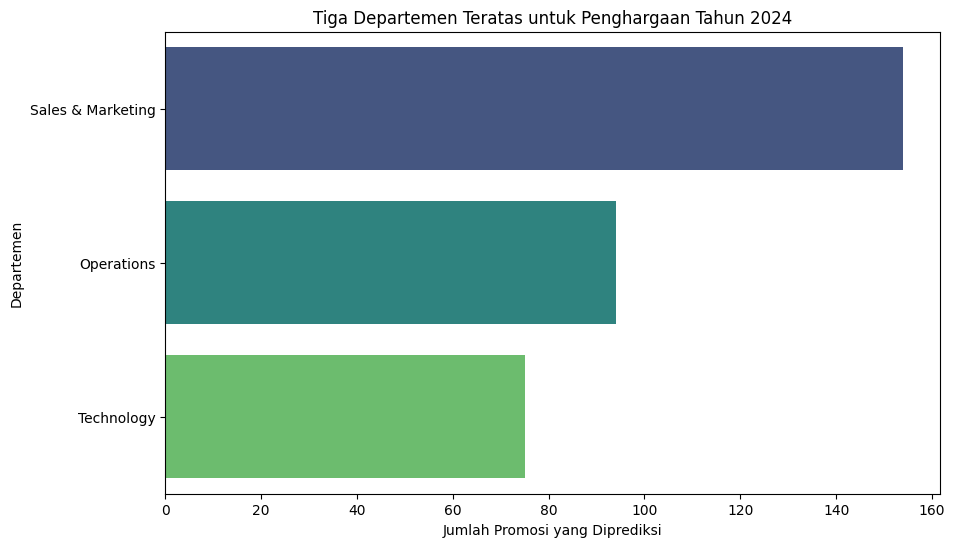

In [ ]:
# Visualisasi hasil
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_departments, x='predicted_promoted', y='department', palette='viridis')
plt.title('Tiga Departemen Teratas untuk Penghargaan Tahun 2024')
plt.xlabel('Jumlah Promosi yang Diprediksi')
plt.ylabel('Departemen')
plt.show()

# 9. Strategi Retensi Karyawan

Bagaimana temuan dari model promosi dapat digunakan untuk meningkatkan strategi retensi karyawan?

Wawasan yang diperoleh dari model dapat memberi informasi kepada HR tentang faktor-faktor yang berkontribusi pada kepuasan dan retensi karyawan, yang mengarah pada kebijakan HR yang lebih terarah.

In [ ]:
# Import library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Misalkan kita menggunakan predict_data yang sudah ada
# Pertama, kita analisis fitur yang memiliki hubungan kuat dengan promosi
# Kita akan menggunakan model untuk menghitung feature importance
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Menggunakan model yang sudah dilatih untuk mendapatkan fitur penting
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Mendapatkan pentingnya fitur
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})


In [ ]:
# Mengurutkan fitur berdasarkan pentingnya
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)


In [ ]:
# Menampilkan 10 fitur teratas yang mempengaruhi promosi
print("Fitur yang Memengaruhi Promosi:")
print(feature_importance_df.head(10))

Fitur yang Memengaruhi Promosi:
                         feature  importance
5             avg_training_score    0.313685
1                            age    0.150055
3              length_of_service    0.122469
2           previous_year_rating    0.063656
4                    awards_won?    0.031825
52  recruitment_channel_sourcing    0.031277
0                no_of_trainings    0.028534
50                      gender_m    0.026080
12  department_Sales & Marketing    0.022028
9          department_Operations    0.021036


<ipython-input-204-2a12bc5779bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(10), x='importance', y='feature', palette='viridis')


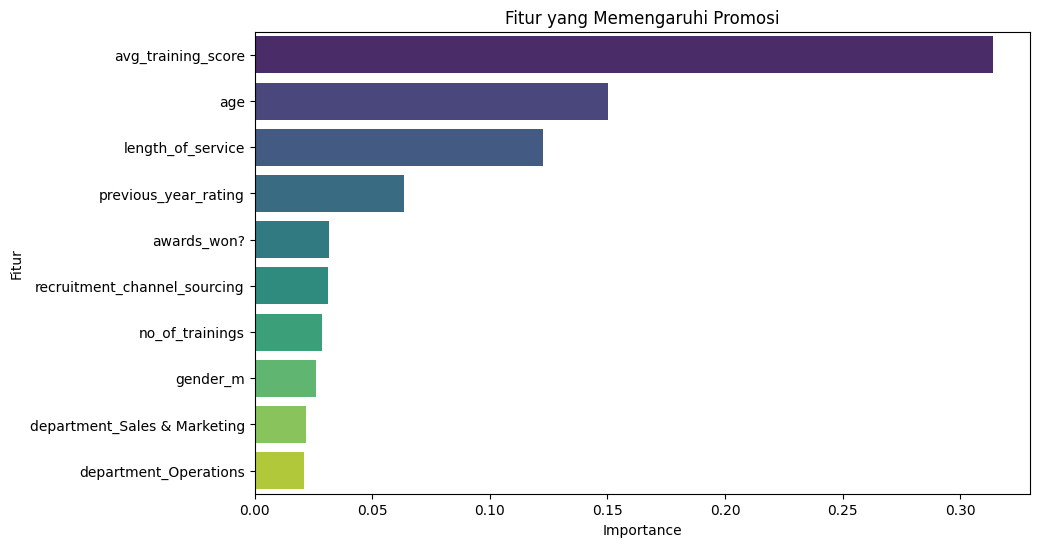

In [ ]:
# Visualisasi fitur penting
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='importance', y='feature', palette='viridis')
plt.title('Fitur yang Memengaruhi Promosi')
plt.xlabel('Importance')
plt.ylabel('Fitur')
plt.show()

In [ ]:

print("Rekomendasi untuk Meningkatkan Retensi Karyawan:")
print("- Fokus pada program pelatihan dan pengembangan karyawan.")
print("- Tawarkan penghargaan dan pengakuan kepada karyawan yang berkinerja tinggi.")
print("- Lakukan survei kepuasan karyawan secara berkala untuk mengetahui area yang perlu diperbaiki.")
print("- Ciptakan budaya kerja yang inklusif dan mendukung keseimbangan kerja-hidup.")

Rekomendasi untuk Meningkatkan Retensi Karyawan:
- Fokus pada program pelatihan dan pengembangan karyawan.
- Tawarkan penghargaan dan pengakuan kepada karyawan yang berkinerja tinggi.
- Lakukan survei kepuasan karyawan secara berkala untuk mengetahui area yang perlu diperbaiki.
- Ciptakan budaya kerja yang inklusif dan mendukung keseimbangan kerja-hidup.
